In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#read in the csv's
df_analyst=pd.read_csv('data_analyst.csv')
df_scientist = pd.read_csv('data_scientist.csv')
#strips dollar sign/ cleans the salary column
def f(x):
    x= x.strip("$")
    x= x.replace(',','')
    return x
df_scientist.loc[~df_scientist["Salary"].isna(),"Salary"]=df_scientist.loc[~df_scientist['Salary'].isna(),'Salary'].map(f)
df_scientist['Salary']= df_scientist['Salary'].astype(float)
df_scientist.head()

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,5,144500.0,Yes,PhD,No,1.0,https://www.linkedin.com/jobs/view/3480836400/...,Scientist
1,2,144500.0,Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3482317582/...,Scientist
2,1,144500.0,Yes,Master,No,0.0,https://www.linkedin.com/jobs/view/3485598972/...,Scientist
3,4,144500.0,Yes,PhD,Yes,0.0,https://www.linkedin.com/jobs/view/3474104997/...,Scientist
4,4,144500.0,Yes,Unspecified,No,1.0,https://www.linkedin.com/jobs/view/3499243413/...,Scientist


In [3]:
#combine the two pd dataframes
df = pd.concat([df_analyst.reset_index(drop=True), df_scientist.reset_index(drop=True)], axis=0,ignore_index=True)

df_plot=df #just in case to compare with original combined df
del df_plot[df_plot.columns[0]] #delete index column
df_plot.head()

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,2,96955.0,No,Master,Yes,1.0,https://www.linkedin.com/jobs/view/3249211510/...,Analyst
1,6,96955.0,No,Master,No,1.0,https://www.linkedin.com/jobs/view/3487242175/...,Analyst
2,4,96955.0,No,Bachelor,Yes,1.0,https://www.linkedin.com/jobs/view/3505418682/...,Analyst
3,0,96955.0,No,Unspecified,No,2.0,https://www.linkedin.com/jobs/view/3498974602/...,Analyst
4,6,96955.0,No,Unspecified,No,5.0,https://www.linkedin.com/jobs/view/3508607089/...,Analyst


In [28]:
df_na = df.loc[df['Salary'] != 96955.0]
df_na = df_na.loc[df_na['Salary'] != 144500.0]
df_na.to_csv('with_category.csv')
df_na.head() #unfactorized categories dataset 

df_na.to_csv('with_category.csv')
len(df_na)

32

Text(0.5, 0.98, 'ggpairs')

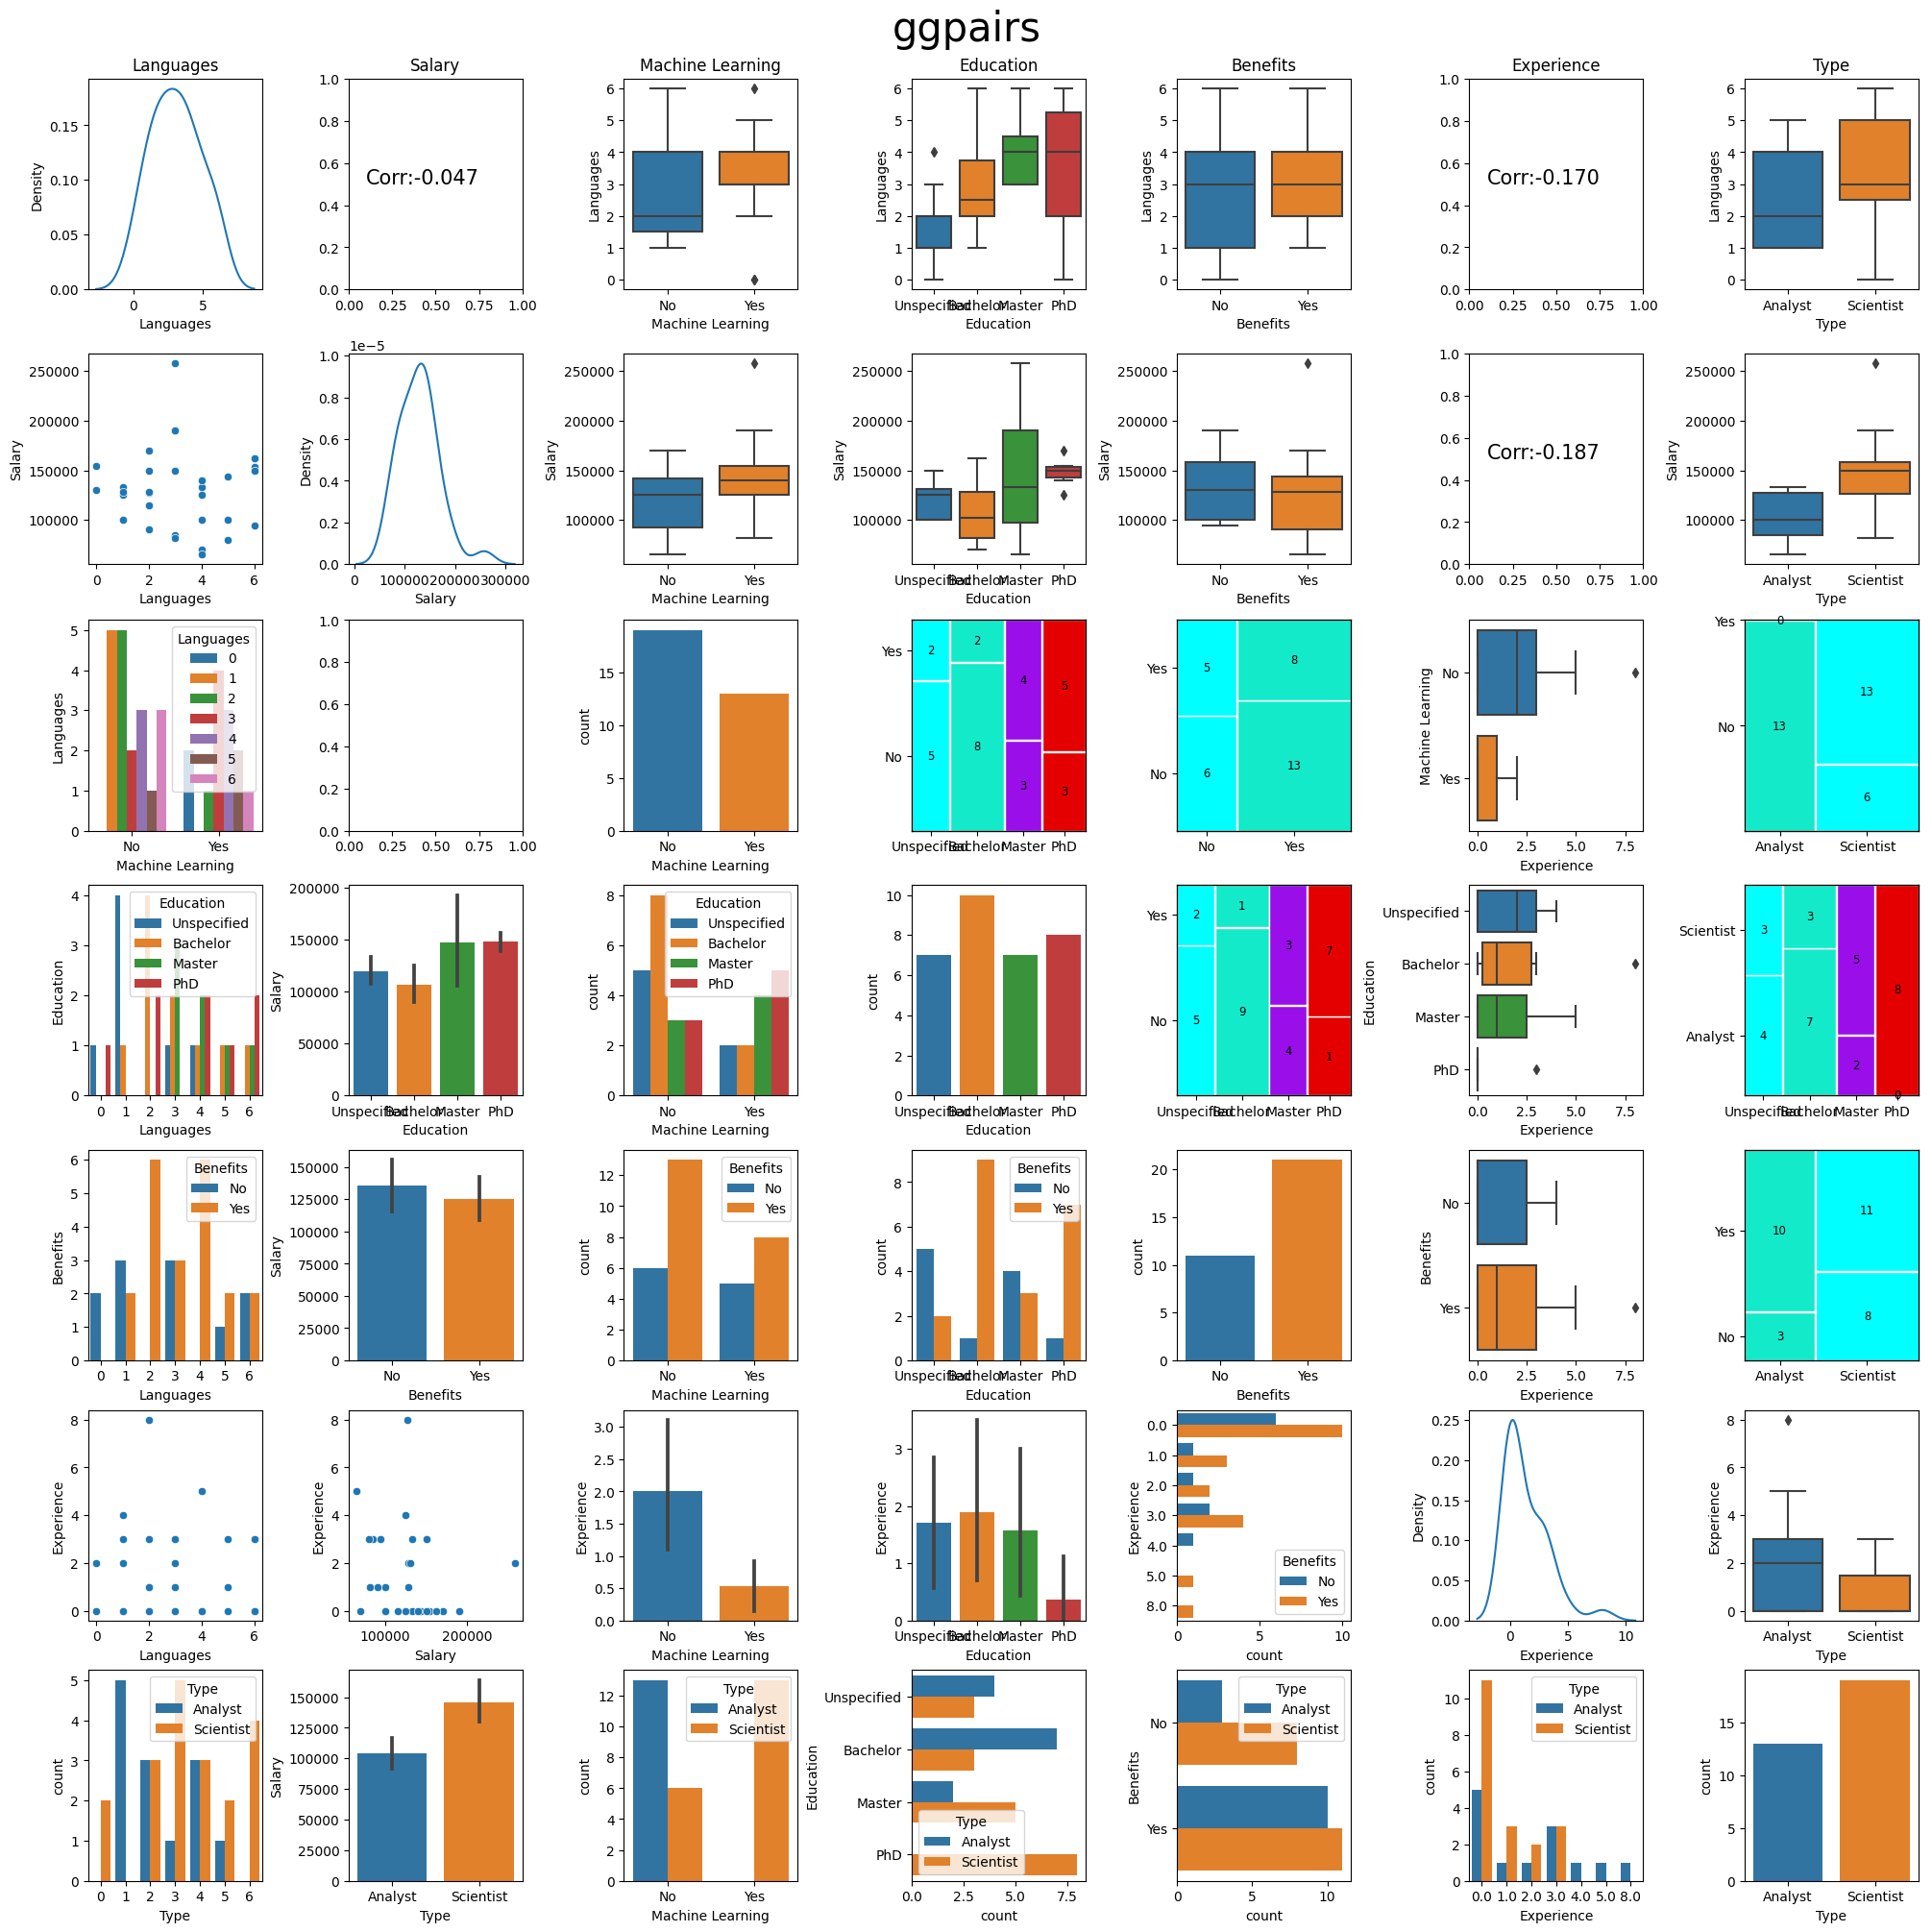

In [86]:
#figure, axes and axis
fig, axes = plt.subplots(nrows=7, ncols = 7,figsize=(20, 20), layout = 'constrained')
#Language on itself
sns.kdeplot(df_na, x="Languages",ax=axes[0][0])
ax=axes[0][0].set_title('Languages')


#Lang-Salary coef
sal_corr=df_na['Languages'].corr(df_na['Salary'])
ax=axes[0][1].text(0.1, 0.5,'Corr:-0.047', fontsize=15)
ax=axes[0][1].set_title('Salary')

#Language-Machine Learning
sns.boxplot(data=df_na, x="Machine Learning",y="Languages",ax=axes[0][2])
ax=axes[0][2].set_xlabel('Machine Learning')
ax=axes[0][2].set_ylabel('Languages')
ax=axes[0][2].set_title('Machine Learning')

#Language-Education
sns.boxplot(data=df_na, x="Education",y="Languages",ax=axes[0][3])
ax=axes[0][3].set_xlabel('Education')
ax=axes[0][3].set_ylabel('Languages')
ax=axes[0][3].set_title('Education')

#Language-Benefits
sns.boxplot(data=df_na, x="Benefits",y="Languages",ax=axes[0][4])


ax=axes[0][4].set_title('Benefits')

#Language-Experience (correlation coef)
ax=axes[0][5].text(0.1, 0.5,'Corr:-0.170', fontsize=15)


ax=axes[0][5].set_title('Experience')

#Language-Type
sns.boxplot(data=df_na, x="Type",y="Languages",ax=axes[0][6])
ax=axes[0][6].set_xlabel('Type')
ax=axes[0][6].set_ylabel('Languages')
ax=axes[0][6].set_title('Type')

#Language-Salary(scatterplot)
sns.scatterplot(df_na, x="Languages", y="Salary",ax=axes[1][0])
ax=axes[1][0].set_xlabel('Languages')
ax=axes[1][0].set_ylabel('Salary')

#Language-Machine Learning (bar)
sns.countplot(data=df_na, x="Machine Learning",hue="Languages",ax=axes[2][0])
ax=axes[2][0].set_xlabel('Machine Learning')
ax=axes[2][0].set_ylabel('Languages')

#Language-Education (bar)
sns.countplot(data=df_na, x="Languages",hue="Education",ax=axes[3][0])
ax=axes[3][0].set_xlabel('Languages')
ax=axes[3][0].set_ylabel('Education')

#Language-Benefits (bar)
sns.countplot(data=df_na, x="Languages",hue="Benefits",ax=axes[4][0])
ax=axes[4][0].set_xlabel('Languages')
ax=axes[4][0].set_ylabel('Benefits')

#Language-Experience (scatterplot)
sns.scatterplot(df_na, x="Languages", y="Experience",ax=axes[5][0])
ax=axes[5][0].set_xlabel('Languages')
ax=axes[5][0].set_ylabel('Experience')

#Language-Type (bar)
sns.countplot(data=df_na, x="Languages",hue="Type",ax=axes[6][0])
ax=axes[6][0].set_xlabel('Type')



##Salary
#rows
##Salary itself
sns.kdeplot(df_na, x="Salary",ax=axes[1][1])
##Salary-Machine Learning (box)
sns.boxplot(data=df_na, x="Machine Learning",y="Salary" ,ax=axes[1][2])
##Salary-Education (box)
sns.boxplot(data=df_na, x="Education",y="Salary",ax=axes[1][3])
##Salary-Benefits (box)
sns.boxplot(data=df_na, x="Benefits",y="Salary",ax=axes[1][4])
##Experience (correlation coef)
ax=axes[1][5].text(0.1, 0.5,'Corr:-0.187', fontsize=15)
##Type (box)
sns.boxplot(data=df_na, x="Type",y="Salary", ax=axes[1][6])

#column
##Sal-Machine Learning (bar)
###sns.countplot(data=df_na, hue="Machine Learning",x="Salary", ax=axes[2][1])
subfigs = fig.subfigures(2, 1, wspace=0.07)

axsLeft = subfigs[0].subplots(2,1, sharey=True)
subfigs[0].set_facecolor('0.75')
##Sal-Education (bar)
sns.barplot(data=df_na, x="Education",y="Salary", ax=axes[3][1])
##Sal-Benefits (bar)
sns.barplot(data=df_na, x="Benefits",y="Salary", ax=axes[4][1])
##Sal-Experience (scatterplot)
sns.scatterplot(df_na, x="Salary", y="Experience",ax=axes[5][1])
##Sal-Type (bar)
sns.barplot(data=df_na, x="Type",y="Salary", ax=axes[6][1])

#Machine Learning
#Row
##Machine Learning (bar on itself)
sns.countplot(df_na,x='Machine Learning',ax=axes[2][2])
##Education (mosaic)
from statsmodels.graphics.mosaicplot import mosaic

props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Bachelor','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Bachelor','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Unspecified','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Unspecified','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Master','Yes')]={'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Master','No')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('PhD','Yes')]={'facecolor':'xkcd:red','edgecolor':'white'}
props[('PhD','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Bachelor','Yes'):2,('Master','Yes'):4,('PhD','Yes'):5,('Unspecified','Yes'):2,
                    ('Bachelor','No'):8,('Master','No'):3,('PhD','No'):3,('Unspecified','No'):5}[k]
mosaic(df_na,['Education','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][3])

##Benefits (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Yes','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('No','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
labelizer=lambda k:{('Yes','Yes'):8,('No','Yes'):5,
                    ('Yes','No'):13,('No','No'):6}[k]
mosaic(df_na,['Benefits','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][4])
##Experience (box)
sns.boxplot(data=df_na, x="Experience",y="Machine Learning", ax=axes[2][5])
## Type (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):0,('Scientist','Yes'):13,
                    ('Analyst','No'):13,('Scientist','No'):6}[k]
mosaic(df_na,['Type','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][6])

#ML-Columns
##ML-Education (bars 2*4) stacked bar plot maybe
sns.countplot(data=df_na, x="Machine Learning",hue="Education", ax=axes[3][2])
##Benefits (stacked bars)
sns.countplot(data=df_na, x="Machine Learning",hue="Benefits", ax=axes[4][2])
##Experience (horizontal bars)
sns.barplot(data=df_na, x="Machine Learning", y="Experience", ax=axes[5][2])
##Type (stacked bars)
sns.countplot(data=df_na, x="Machine Learning", hue="Type", ax=axes[6][2])

#Education
#row 
##Education (itself)
sns.countplot(df_na,x='Education',ax=axes[3][3])
##Educ-Benefits (mosaic)
props={}
props[('Benefits','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Benefits','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Bachelor','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Bachelor','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Unspecified','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Unspecified','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Master','Yes')]={'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Master','No')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('PhD','Yes')]={'facecolor':'xkcd:red','edgecolor':'white'}
props[('PhD','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Bachelor','Yes'):1,('Master','Yes'):3,('PhD','Yes'):7,('Unspecified','Yes'):2,
                    ('Bachelor','No'):9,('Master','No'):4,('PhD','No'):1,('Unspecified','No'):5}[k]
mosaic(df_na,['Education','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[3][4])
##Educ-Experience (box)
sns.boxplot(data=df_na, x="Experience",y="Education", ax=axes[3][5])
##Educ-Type(mosaic)
props={}
props[('Bachelor','Analyst')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Bachelor','Scientist')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Unspecified','Analyst')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Unspecified','Scientist')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Master','Analyst')]={'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Master','Scientist')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('PhD','Analyst')]={'facecolor':'xkcd:red','edgecolor':'white'}
props[('PhD','Scientist')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Bachelor','Analyst'):7,('Master','Analyst'):2,('PhD','Analyst'):0,('Unspecified','Analyst'):4,
                    ('Bachelor','Scientist'):3,('Master','Scientist'):5,('PhD','Scientist'):8,('Unspecified','Scientist'):3}[k]
mosaic(df_na,['Education','Type'],labelizer=labelizer,properties=props,ax=axes[3][6])
#columns
##Benefits (2 bars)
sns.countplot(df_na,x='Education',hue="Benefits",ax=axes[4][3])
##Experience (4 horizontal bars)
sns.barplot(df_na,x='Education',y='Experience',ax=axes[5][3])
##Type (2 rows of 4 columns)
sns.countplot(data=df_na, y="Education",hue="Type",ax=axes[6][3])

#Benefits
#Rows
##itself
sns.countplot(data=df_na, x="Benefits",ax=axes[4][4])
##Experience
sns.boxplot(data=df_na, x="Experience",y="Benefits", ax=axes[4][5])
##Type (mosaic)
props={}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):10,('Scientist','Yes'):11,
                    ('Analyst','No'):3,('Scientist','No'):8}[k]
mosaic(df_na,['Type','Benefits'],labelizer=labelizer,properties=props,ax=axes[4][6])
#Column
##Experience (horizontal bars)
sns.countplot(data=df_na, y='Experience',hue="Benefits",ax=axes[5][4])
##Type 
sns.countplot(data=df_na, y='Benefits',hue="Type",ax=axes[6][4])

#Experience
#rows
##itself (line)
sns.kdeplot(df_na, x="Experience",ax=axes[5][5])
##Type
sns.boxplot(data=df_na, x="Type",y="Experience", ax=axes[5][6])

#columns
##Type
sns.countplot(df_na, x="Experience",hue="Type",ax=axes[6][5])
##Type on itself
sns.countplot(data=df_na, x="Type",ax=axes[6][6])

fig.suptitle(t = 'ggpairs', fontsize = 30)

In [45]:
#crosstable for benefits-ML
crosstable=pd.crosstab(df_na['Type'],df_na['Benefits'])
crosstable

Benefits,No,Yes
Type,,
Analyst,3,10
Scientist,8,11


(<Figure size 640x480 with 3 Axes>,
 {('Analyst', 'No'): (0.0, 0.0, 0.40422885572139305, 0.23000255558395097),
  ('Analyst', 'Yes'): (0.0,
   0.2333248147201636,
   0.40422885572139305,
   0.7666751852798365),
  ('Scientist', 'No'): (0.40920398009950254,
   0.0,
   0.5907960199004976,
   0.4196537856268578),
  ('Scientist', 'Yes'): (0.40920398009950254,
   0.42297604476307044,
   0.5907960199004976,
   0.5770239552369295)})

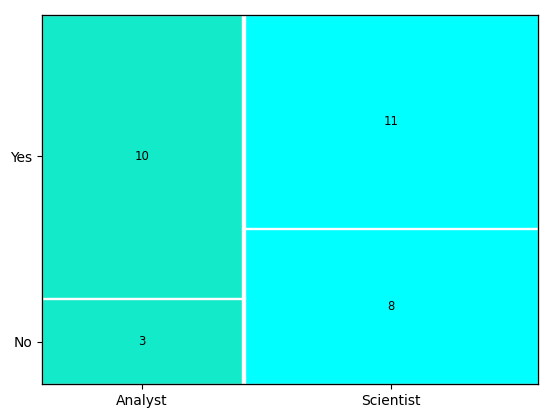

In [47]:
#test mosaics
props={}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:cyan','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):10,('Scientist','Yes'):11,
                    ('Analyst','No'):3,('Scientist','No'):8}[k]
mosaic(df_na,['Type','Benefits'],labelizer=labelizer,properties=props)


In [62]:
#Pearson correlations
sal_corr

-0.04721513282159853

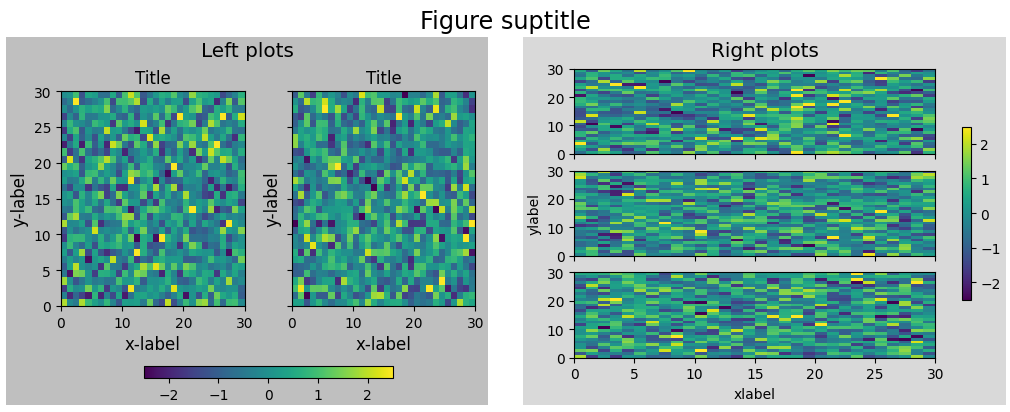

In [87]:
#example subfigures
def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()